In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls 'drive/MyDrive/ML_Course/Data/Medical_charges'

medical-charges.csv



**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
df = pd.read_csv("drive/MyDrive/ML_Course/Data/Medical_charges/medical-charges.csv")

In [5]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Щоб спрогнозувати charges можна використати наступні підходи:  
- поділити всіх клієнтів на вікові групи і порахувати медіанне значення для кожної вікової групи. Після цього можна визначити викиди в даних для кожної вікової групи і порахувати середнє значення в кожной групі без врахування викидів. Порівняти отримані медіану і середнє. Якщо значення близькі, то можна використати одне з них в якості предікта для відповідної вікової категорії.  
- наступним кроком можна розділити кожну вікову групу по гендеру і знову перерахувати значення.Так ми вже отримаємо більше ознак.
- наступним кроком додамо розділення по змінній smoker.  
Таким чином, ми отримаємо набір ознак, з яким зможемо порівнювати потенційного клієнта і матимемо середнє значення charges для нього, наприклад для чоловіка, 35 років, не курця ми можемо назначити charges на рівні середнього значення для чоловіків, з вікової групи від 30 до 40 років, які не курять.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

###Проаналізуємо Charges в розрізі гендеру

In [6]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   nbins=47,
                   title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Висновок:**  
- діапазон значень charges для чоловіків більший ніж для жінок  
- серед клієнтів з charges до 2000 більше чоловіків  
- в діапазоні charges від 26000 до 36000 відмічаємо зниження кількості спостережень, після чого знову відбувається невелике зростання  
- серед клієнтів з сумою charges більше 34000 переважають чоловіки  
- для обох категорій гендеру спостерігаємо наявність викидів (дуже великих сум charges, що перевищують 50000)  
- медіанне значення для обох категорій гендеру є однаковим

###Проаналізуємо Charges в розрізі регіону

In [7]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   nbins=47,
                   title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Висновок:**  
- діапазон значень charges найбільший для регіону 'southeast'
- медіанне значення є найбільшим для регіону 'northeast'  
- в діапазоні charges від 14000 до 34000 регіон 'southwest' має найменшу кількість спостережень  
- в діапазоні charges від 38000 до 50000 регіон 'southeast' має найбільшу кількість спостережень

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

###Проаналізуємо стовпець region в розрізі чи є клієнт курцем

In [8]:
fig = px.histogram(df,
                   x='region',
                   color='smoker',
                   nbins=47,
                   title='Distribution of Region')
fig.update_layout(bargap=0.1)
fig.show()

**Висновок:**  
- найбільша кількість курців зафіксована в регіоні 'southeast'  
- цей факт можна пояснити тим, що клієнтів з 'southeast' в цілому більше, ніж з інших регіонів  
- загальний аналіз показує, що розподіл даних змінної rigeon є рівномірним

###Проаналізуємо розподіл змінної 'Children' в залежності від того, чи є клієнт курцем

In [9]:
fig = px.histogram(df,
                   x='children',
                   color='smoker',
                   nbins=47,
                   title='Distribution of Children')
fig.update_layout(bargap=0.1)
fig.show()

**Висновок:**  
- найбільша кількість спостережень зосереджена на значенні 0 дітей  
- серед клієнтів, які мають 4 або 5 дітей, мінімальний відсоток курців  
- різниця між кількістю клієнтів з 1, 2 та 3 дітьми менша, ніж різниця між кількістю клієнтів, що не мають дітей і тими, хто має хоча б 1 дитину.
- кількість клієнтів, що мають 4 та 5 дітей може вважатися відхиленням від норми, через незначну кількість таких клієнтів

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

###Проаналізуємо зв'язок між цільовою змінною 'charges' та змінною 'children'

In [10]:
fig = px.violin(df,
                   x='charges',
                   color='children',
                   title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Висновок:**  
- найширший діапазон значень charges припадає на клієнтів, які не мають дітей  
- найменший діапазон у клієнтів, які мають 5 дітей. Пов'язано з незначною кількістю спостережень  
- у клієнтів, які не мають дітей, спостерігаємо зменшення кількості спостережень в районі значення charges від 7000 до 10000, а після цього, знову зростання кількості спостережень  
- серед категорій children з великою кількістю спостережень, найбільше медіанне значення (10.6К) мають клієнти з 3 дітьми  
- візуально кількість викидів для клієнтів з 1 дитиною менше ніж для клієнтів без дітей  
- в цілому отримана візуалізація не дає чітких доказів залежності значення charges від кількості дітей

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

Побудуємо графік залежності між змінними charges та age для клієнтів, що не є курцями, щоб візуально побачити наявність тренду

In [11]:
non_smoker_df = df[df.smoker == 'no']

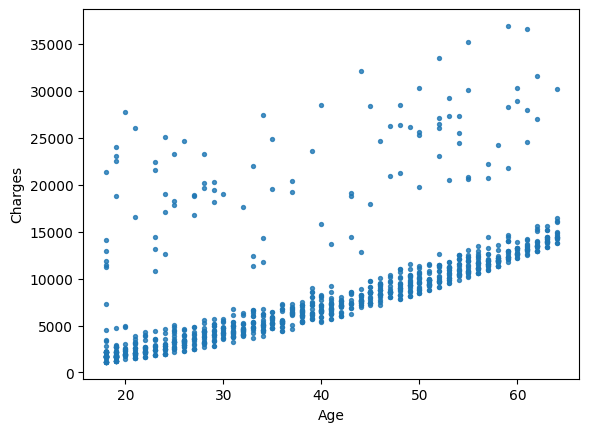

In [12]:
plt.scatter(non_smoker_df.age, non_smoker_df.charges, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.show();

На графіку чітко бачимо, що дані розподілені на два умовних кластера: дані, що мають більшу кількість спостережень і не є викидами, а також дані, які можна вважати викидами. Вони є більш розрідженими.  

In [13]:
def estimate_charges(age, w, b):
    return w * age + b

In [14]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

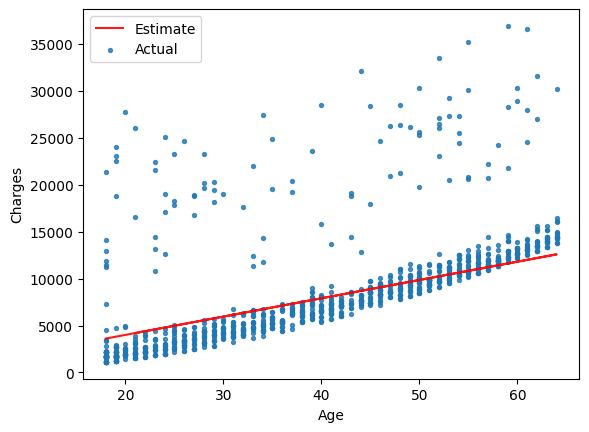

In [15]:
try_parameters(non_smoker_df, 195, 100)

Бачимо, що з заданими параметрами, лінія передбачення має недостатній кут нахилу, що свідчить про те, що необхідно збільшити параметр w. Також, змінемо параметр b в більшу сторону, щоб трохи підняти лінію.

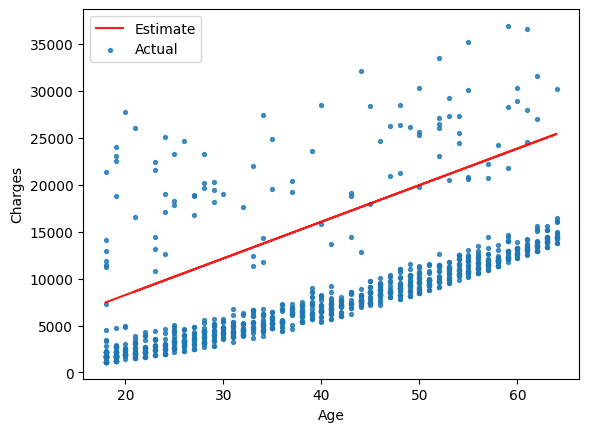

In [16]:
try_parameters(non_smoker_df, 390, 450)

Цього разу кут нахилу виглядає краще, проте на цей раз спробуємо його трохи зменшити. Також, відзначаємо, що наразі лінія враховує всі дані, включно з викидами, і виглядає підходящою для загального тренду. Однак її положення може бути не оптимальним, якщо основна ціль — точніше моделювати основну масу спостережень. Відповідно, вважаю за доцільне змістити лінію передбачення нижче, ближче до основної маси спостережень.

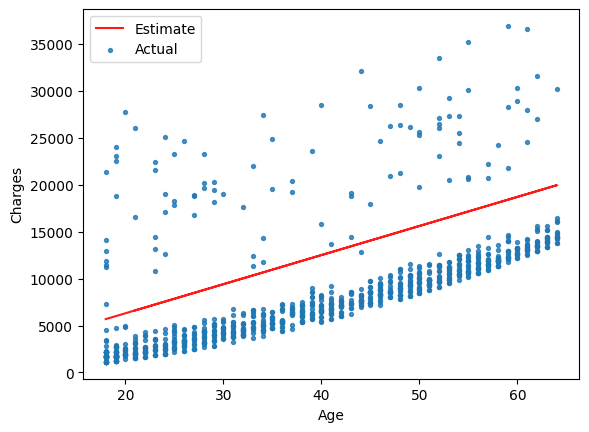

In [17]:
try_parameters(non_smoker_df, 310, 100)

Наразі лінія передбачення виглядає оптимально

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

Визначаємо функцію для розрахунку RMSE

In [18]:
def rmse_calculate(df, target, w, b):
  predicted_charges = estimate_charges(df.age, w, b)
  target_charges = df[target]
  rmse = np.sqrt(np.mean(np.square(predicted_charges - target_charges)))
  return rmse


In [19]:
parameters = [[195, 100], [390, 450], [310, 100]]

In [20]:
i = 0
while i < len(parameters):
    param_pair = parameters[i]
    rmse = rmse_calculate(non_smoker_df, 'charges', param_pair[0], param_pair[1])
    print(f'RMSE for ({param_pair[0]}, {param_pair[1]}) - {rmse}')
    i += 1

RMSE for (195, 100) - 4816.762220054391
RMSE for (390, 450) - 8895.522395100497
RMSE for (310, 100) - 6092.470112139191


Виявилось, що саме перша пара параметрів (195, 100) дає найменше значення кореневої середньоквадратичної помилки. Саме цей варіант відображує таргет лінію, яка перетинає основну частину спостережень на графіку